In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import os

In [2]:
name = 'Original_Pretrained_R2plus1DMotionSegNet.pth.csv'
# name = 'dropout_v3_0_10_R2plus1DMotionSegNet.pth.csv'

data = pd.read_csv(f'./csvs/{name}')

pred_ef = 'Predicted EF'
true_ef = 'True EF'

pred_gls = 'Predicted GLS'
true_gls = 'True GLS'

warp_gls = "Warp GLS"

In [3]:
data.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,57.660572,55.651562,-0.155008,-0.174877,-0.131506,0.936521,0.907664,0.936171,0.912578
std,11.830781,12.095286,0.066949,0.104513,0.559186,0.029099,0.049415,0.028574,0.045683
min,10.039696,10.192957,-0.366337,-0.404040,-0.678832,0.682607,0.449400,0.676852,0.450435
25%,53.011067,51.927948,-0.198113,-0.222222,-0.196721,0.923341,0.888903,0.923179,0.894693
50%,59.691563,58.754887,-0.161290,-0.182540,-0.160920,0.942648,0.918592,0.942120,0.923935
75%,65.565989,63.574314,-0.115544,-0.138889,-0.118546,0.956883,0.941129,0.955779,0.942580
max,87.289323,84.452354,0.244681,2.484848,17.714286,0.983438,0.975293,0.978547,0.977159


In [4]:
def bland_altman(df, label1, label2, save=False, postfix=''):
    '''
    input:
        df - pandas dataframe
        label1 - string of key to access array1 of vals
        label2 - string of key to access array2 of vals
        save - boolean of whether to save figure as a SVG image file
    output:
        scatter plot of data, with a line of best fit and a R^2 (coefficient of correlation)
    '''
    
    plt.figure(figsize=(10,8))
    plt.xlabel(label1, fontsize=10)
    plt.ylabel(label2, fontsize=10)
    
    # line of best fit
    
    if (max(df[label1])) > (max(df[label2])):
        max_ = (max(df[label1]))
    else:
        max_ = (max(df[label2]))
    if min(df[label1]) < min(df[label2]):
        min_ = min(df[label1])
    else:
        min_ = min(df[label2])
        
    num_points = 1000
    points = np.linspace(min_,max_,num_points)
    plt.plot(points,points,'r',linewidth=3,zorder=1)
    # print(f'tmp: {tmp}')
    # plt.plot([i for i in range(tmp)], [i for i in range(tmp)], 'r', linewidth=3, zorder=1)
    
    # scatter plot of data
    plt.scatter(df[label1], df[label2], zorder=2)
    
    # correlation of coefficient R
    r = df.corr()[label1][label2]
    plt.text(-.13, -.30, f'r = {r}', fontsize=20)
    
    if save:
        plt.savefig(f'./images/bland_altmans/{name}_{postfix}.svg')

In [5]:
# remove bottom 1% and top 1% of data to remove outliers (quartile filter)
# for both label2
df0 = data
q_low_true_gls = df0[true_gls].quantile(0.01)
q_hi_true_gls  = df0[true_gls].quantile(0.99)

df1 = df0[(df0[true_gls] < q_hi_true_gls) & (df0[true_gls] > q_low_true_gls)]

q_low_warp_gls = df1[warp_gls].quantile(0.01)
q_hi_warp_gls  = df1[warp_gls].quantile(0.99)

df2 = df1[(df1[warp_gls] < q_hi_warp_gls) & (df1[warp_gls] > q_low_warp_gls)]

data_final = df2

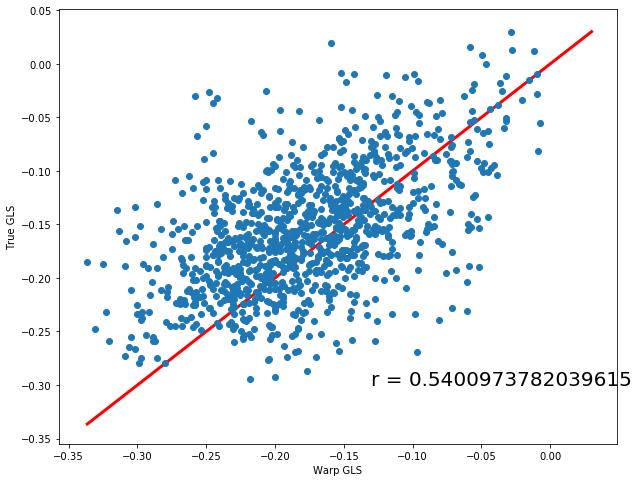

In [6]:
save = False


# bland_altman(data, pred_ef, true_ef, save=False)
bland_altman(data_final, warp_gls, true_gls, save=save, postfix='warp_true_gls')

In [7]:
df1.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,57.709523,55.681793,-0.155126,-0.174836,-0.156279,0.937141,0.908951,0.936604,0.913839
std,11.705734,11.953107,0.065899,0.104459,0.058392,0.028019,0.046136,0.028030,0.042183
min,10.039696,10.192957,-0.366337,-0.404040,-0.294118,0.682607,0.617809,0.676852,0.606257
25%,53.142527,51.927948,-0.197917,-0.220991,-0.195652,0.923603,0.889706,0.923972,0.895688
50%,59.691563,58.748886,-0.161290,-0.181818,-0.160920,0.942916,0.918878,0.942273,0.924452
75%,65.541051,63.526506,-0.115746,-0.139010,-0.120370,0.957004,0.941325,0.956014,0.942637
max,87.289323,79.707329,0.244681,2.484848,0.033557,0.983438,0.975293,0.978547,0.977159


In [8]:
df2.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,57.798491,55.791121,-0.155927,-0.177374,-0.156658,0.937002,0.909027,0.936475,0.913861
std,11.439515,11.704863,0.063236,0.060655,0.057178,0.027923,0.046185,0.028133,0.042217
min,10.039696,10.192957,-0.339450,-0.336449,-0.294118,0.682607,0.617809,0.676852,0.606257
25%,53.210615,52.120998,-0.197802,-0.220183,-0.195312,0.923569,0.889695,0.923981,0.895714
50%,59.626947,58.715397,-0.161616,-0.181818,-0.160920,0.942798,0.918978,0.942128,0.924452
75%,65.471073,63.494095,-0.117021,-0.139706,-0.120879,0.956846,0.941341,0.955945,0.942651
max,87.289323,79.707329,0.212963,-0.007812,0.030000,0.983438,0.975293,0.978547,0.977159


In [9]:
data.describe()

,Predicted EF,True EF,Seg GLS,Warp GLS,True GLS,Seg ED Dice,Seg ES Dice,Warp ED Dice,Warp ES Dice
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,57.660572,55.651562,-0.155008,-0.174877,-0.131506,0.936521,0.907664,0.936171,0.912578
std,11.830781,12.095286,0.066949,0.104513,0.559186,0.029099,0.049415,0.028574,0.045683
min,10.039696,10.192957,-0.366337,-0.404040,-0.678832,0.682607,0.449400,0.676852,0.450435
25%,53.011067,51.927948,-0.198113,-0.222222,-0.196721,0.923341,0.888903,0.923179,0.894693
50%,59.691563,58.754887,-0.161290,-0.182540,-0.160920,0.942648,0.918592,0.942120,0.923935
75%,65.565989,63.574314,-0.115544,-0.138889,-0.118546,0.956883,0.941129,0.955779,0.942580
max,87.289323,84.452354,0.244681,2.484848,17.714286,0.983438,0.975293,0.978547,0.977159
